# **Rutherford Scattering (short project for PHYS 1113)** 
### Coded by WANG, Xuechi
### Analysed by LUO, Yueyang

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import tqdm

In [2]:
from scipy import constants

## Initialize some constants

In [3]:
Z1 = 2  # Atomic number of alpha particle
Z2 = 79  # Atomic number of gold nucleus
e = constants.e  # Elementary charge (C)
epsilon_0 = constants.epsilon_0  # Permittivity of free space (F/m)
(m, _, _) = constants.physical_constants['alpha particle mass']  # Mass of alpha particle (kg)
k = 10  # Initial distance in X direction (sufficiently large)
pi = constants.pi

## Set initial condition 

In [4]:
b = 2  # Impact parameter (can be varied)
X_0 = -k
Y_0 = b
V_X0 = 1.0
V_Y0 = 0.0
delta_tau = 0.001

In [5]:
V_X = np.array([V_X0])
V_Y = np.array([V_Y0])
X = np.array([X_0])
Y = np.array([Y_0])

## Calculate motion by iteration

### The following code may not use in the real experiment due to performance issue (np.append) but it's ok for small stimulation

In [6]:
def cal_X_Y(b):
    X_0 = -k
    Y_0 = b
    V_X0 = 1.0
    V_Y0 = 0.0
    delta_tau = 0.001
    V_X = np.array([V_X0])
    V_Y = np.array([V_Y0])
    X = np.array([X_0])
    Y = np.array([Y_0])
    while (np.sqrt(X[-1]**2 + Y[-1]**2) < 18): # R < 12
        X = np.append(X, X[-1] + delta_tau * V_X[-1])
        Y = np.append(Y, Y[-1] + delta_tau * V_Y[-1])
        A_X = X[-1]/(2*(np.sqrt(X[-1]**2 + Y[-1]**2)**3))
        A_Y = Y[-1]/(2*(np.sqrt(X[-1]**2 + Y[-1]**2)**3))
        V_X = np.append(V_X, V_X[-1] + delta_tau * A_X)
        V_Y = np.append(V_Y, V_Y[-1] + delta_tau * A_Y)
    return (X, Y, V_X, V_Y)

## Plot figures of particle motion

0.1
0.25
0.5
1
2


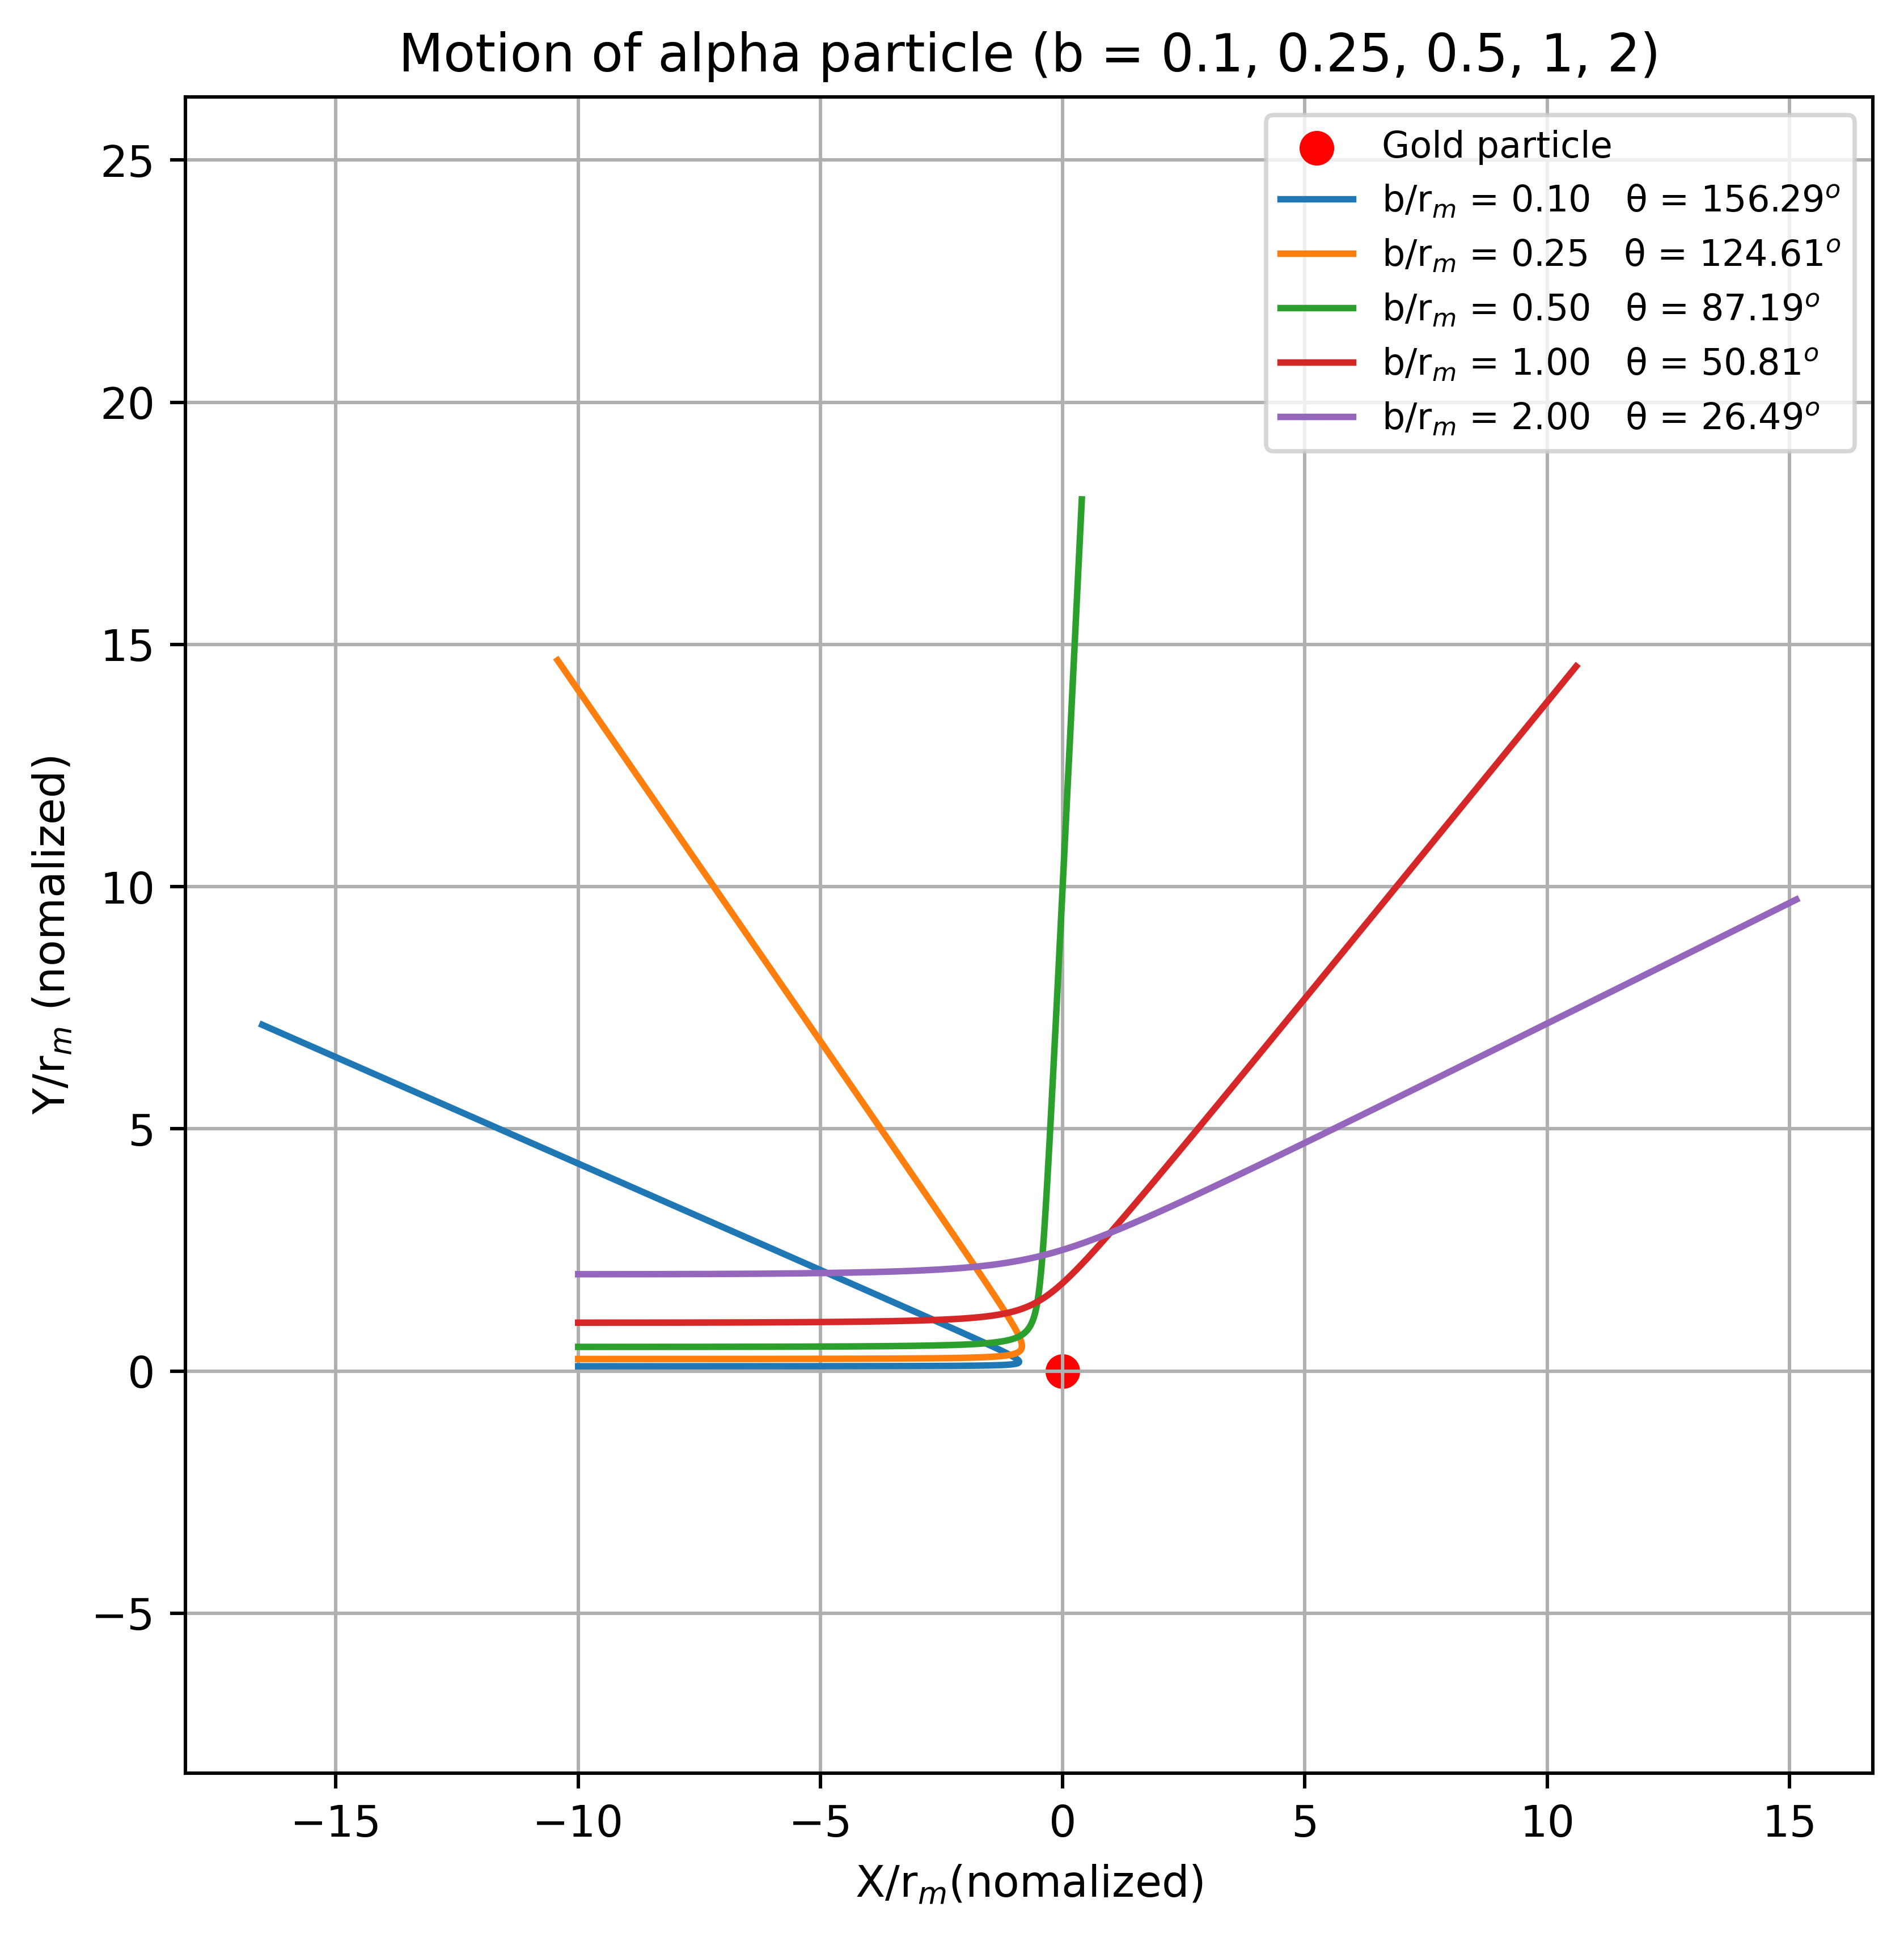

In [7]:
plt.figure(figsize=(38.4/5.5, 38.4/5.5), dpi=550)
plt.scatter([0], [0], marker='o', linewidths=2, label='Gold particle', c='r')
plt.axis('equal')
plt.grid()
plt.title(f"Motion of alpha particle (b = 0.1, 0.25, 0.5, 1, 2)")
for i in [0.1,0.25,0.5,1,2]:
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    theta = np.arctan(V_Y[-1] / V_X[-1])
    if theta < 0:
        theta = np.pi - np.abs(theta)
    plt.plot(X, Y, label='b/r$_m$ = {:.2f}   '.format(i) + 'θ = {:.2f}$^o$'.format(theta*180/pi))
    print(i)
plt.xlabel("X/r$_m$(nomalized)")
plt.ylabel("Y/r$_m$ (nomalized)")
plt.legend(fontsize="small")

## Plot $$\ \ \tan \dfrac{θ}{2} \ \ against \ \ \dfrac{1}{b} /(\dfrac{1}{r_m})$$

###  $$\large $$ We changed the unit of b to $$ \dfrac{1}{r_m}$$ so the slope of fitting line is a constant which is $$  \quad \hat k = \dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 m v_0^2 r_m} = \dfrac{1}{2}$$

100%|#####################################################################################################################################################################| 50/50 [00:45<00:00,  1.11it/s]


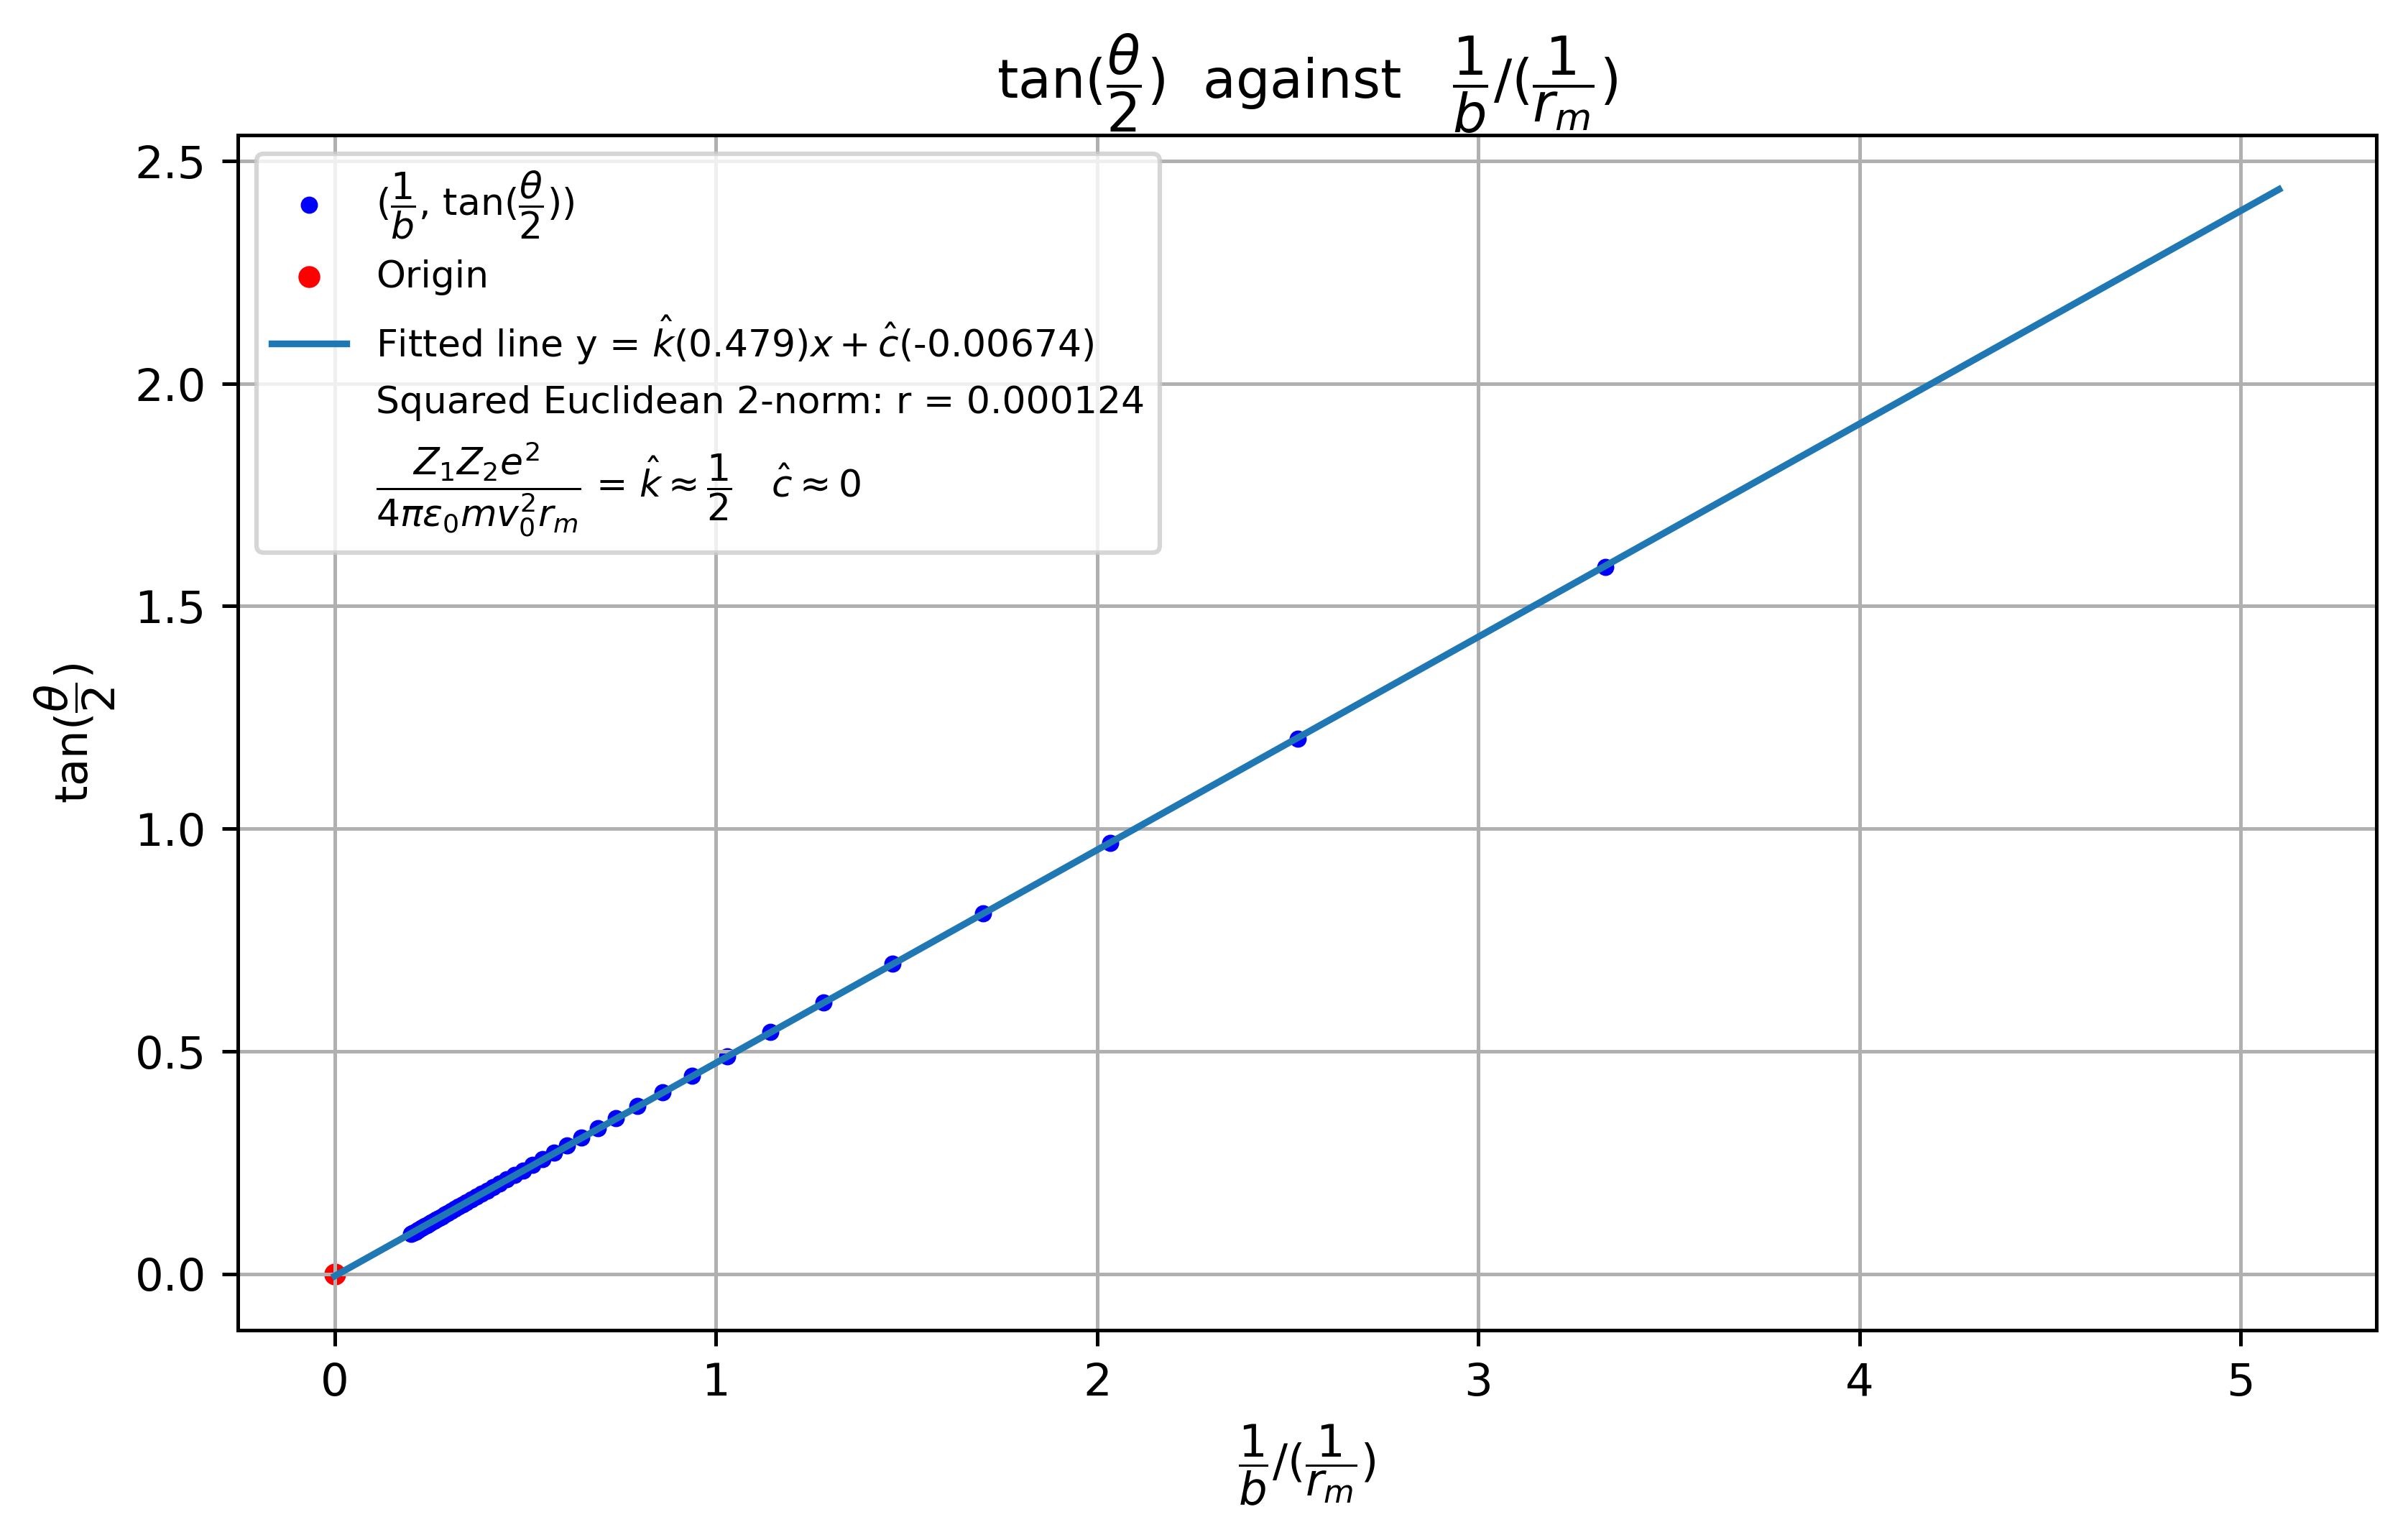

In [8]:
plt.figure(figsize=(38.4/4.5, 21.6/4.5), dpi=450)
plt.xlabel(r"$\dfrac{1}{b} /(\dfrac{1}{r_m})$",)
plt.title("$\\tan(\\dfrac{θ}{2})$  against   $\\dfrac{1}{b}/(\\dfrac{1}{r_m})$")
plt.ylabel(r'$\tan(\dfrac{θ}{2})$')
tan_theta_de_2 = np.array([])
b_devided_1 = np.array([])
for i in tqdm.tqdm(np.linspace(0.3,5,50), ascii=True):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    theta = np.arctan(V_Y[-1] / V_X[-1])
    if theta < 0:
        theta = np.pi - np.abs(theta)
    tan_theta_de_2 = np.append(tan_theta_de_2, np.tan(theta/2))
    b_devided_1 = np.append(b_devided_1, 1/i)
    #plt.scatter(1/i, np.tan(theta/2 - 1e-8), c='b', s=10, label='($\\dfrac{1}{b}$, $tan(\\dfrac{θ}{2})$')
[a, b] = np.linalg.lstsq(np.vstack([b_devided_1 , np.ones(len(b_devided_1))]).T, tan_theta_de_2)[0]
plt.grid()
plt.scatter(b_devided_1, tan_theta_de_2, c='b', s=8, label='($\\dfrac{1}{b}$, $\\tan(\\dfrac{θ}{2}$))')
plt.scatter(0,0, s=15, c='r', label="Origin")
plt.plot(np.linspace(0,5.1, 40), a * np.linspace(0,5.1, 40) + b, label="Fitted line y = $\\hat k(0.479)x + \\hat c$(-0.00674)")
plt.scatter(0,0, label="Squared Euclidean 2-norm: r = 0.000124",c='black',s=0)
plt.scatter(0,0, label="$\\dfrac{Z_1 Z_2 e^2}{4 \\pi \\epsilon_0 m v_0^2 r_m}$ = $  \\hat k \\approx \\dfrac{1}{2} \\quad \\hat c \\approx 0$",c='darkred',s=0)
plt.legend(fontsize='small')

## Least square calculation (to find linear relationship)

$$\Large \text {You may have learned the least square to fit a line and verify its linear relationship. }$$ $$\Large kx  +  c   =  y$$ $$\Large \text {In fact, it should be like this.} \ \ Ax = y \ \ \text{which is the numerical solutioin for } \mathcal{LS} (A, b)$$

### return k (Slope), c (intercept), r (Residual)

In [9]:
np.linalg.lstsq(np.vstack([b_devided_1 , np.ones(len(b_devided_1))]).T, tan_theta_de_2)

(array([ 0.47859306, -0.00495825]),
 array([6.20990908e-05]),
 np.int32(2),
 array([8.7231768 , 3.56777856]))

## Verify the conservation of total energy and angular momentum

### $$ E = \dfrac{1}{2}(V_X^2  + V^2_Y)  + \dfrac{1}{2  R} $$

In [10]:
# Total energy
E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)

In [11]:
# Glance at data of energy
E[0:20] 

array([0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472136,
       0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472136,
       0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472136,
       0.54472136, 0.54472136, 0.54472136, 0.54472136, 0.54472135])

### $$ L = XV_Y  - YV_X = (\vec R \times \dfrac{\vec P}{m}) z$$

In [12]:
# Angular momentum
L = X*V_Y-Y*V_X

In [13]:
# Glance at data of angular momentum 
L[0:20]

array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.,
       -5., -5., -5., -5., -5., -5., -5.])

## Further evaluate the Range, Mean Deviation, Standard Deviation, Medium of E and L 

### Range

In [14]:
def cal_range(A): 
    return np.max(A) - np.min(A)

In [15]:
print(f"{' ':^4}"+f"{'b':^6}"+"       "+f"{'Range of E':^12}"+"       "+f"{'Range of L':^12}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_range = cal_range(E)
    l_range = cal_range(L)
    print(f'{i:.4f}       {e_range:e}       {l_range:e}')

      b           Range of E         Range of L 
 1  0.1000       1.784878e-04       6.372680e-14
 2  0.3042       1.570807e-04       4.263256e-14
 3  0.5083       1.285386e-04       1.176836e-14
 4  0.7125       1.028133e-04       8.482104e-14
 5  0.9167       8.239112e-05       8.348877e-14
 6  1.1208       6.677031e-05       5.773160e-14
 7  1.3250       5.486576e-05       6.572520e-14
 8  1.5292       4.571204e-05       1.234568e-13
 9  1.7333       3.857931e-05       1.563194e-13
10  1.9375       3.294126e-05       1.039169e-13
11  2.1417       2.842202e-05       4.796163e-14
12  2.3458       2.475193e-05       6.039613e-14
13  2.5500       2.173541e-05       5.595524e-14
14  2.7542       1.922875e-05       8.393286e-14
15  2.9583       1.712492e-05       8.615331e-14
16  3.1625       1.534312e-05       5.728751e-14
17  3.3667       1.382158e-05       4.929390e-14
18  3.5708       1.251247e-05       5.817569e-14
19  3.7750       1.137838e-05       5.950795e-14
20  3.9792       1.0

### Mean Deviation

In [16]:
def cal_mean_deviation(A): 
    return np.sum(np.abs(A - np.mean(A)))

In [17]:
print(f"{' ':^4}"+f"{'b':^6}"+"         "+f"{'Mean Deviation of E':^0}"+"     "+f"{'Mean Deviation of L'}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_mean_deviation = cal_mean_deviation(E)
    l_mean_deviation = cal_mean_deviation(L)
    print(f'{i:.4f}            {e_mean_deviation:e}            {l_mean_deviation:e}')

      b            Mean Deviation of E     Mean Deviation of L
 1  0.1000            5.021853e-01            4.160882e-10
 2  0.3042            4.612482e-01            2.559682e-10
 3  0.5083            4.049009e-01            4.537504e-11
 4  0.7125            3.511832e-01            2.307290e-10
 5  0.9167            3.053922e-01            5.140339e-10
 6  1.1208            2.675550e-01            1.805025e-10
 7  1.3250            2.363851e-01            1.686142e-10
 8  1.5292            2.105313e-01            5.303029e-10
 9  1.7333            1.888707e-01            9.629135e-10
10  1.9375            1.705306e-01            3.988669e-10
11  2.1417            1.548437e-01            1.863554e-10
12  2.3458            1.412995e-01            2.936318e-10
13  2.5500            1.295063e-01            2.302580e-10
14  2.7542            1.191589e-01            3.811742e-10
15  2.9583            1.100172e-01            4.208238e-10
16  3.1625            1.018910e-01            2.8696

### Standard Deviation

In [18]:
def cal_standard_deviation(A): 
    return np.std(A)

In [19]:
print(f"{' ':^4}"+f"{'b':^6}"+"       "+f"{'STD of E':^12}"+"       "+f"{'STD of L':^12}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_std = cal_standard_deviation(E)
    l_std = cal_standard_deviation(L)
    print(f'{i:.4f}       {e_std:e}       {l_std:e}')

      b            STD of E           STD of L  
 1  0.1000       2.967601e-05       1.567990e-14
 2  0.3042       2.676456e-05       1.027949e-14
 3  0.5083       2.281350e-05       2.179684e-15
 4  0.7125       1.914083e-05       1.238521e-14
 5  0.9167       1.611043e-05       2.093341e-14
 6  1.1208       1.369344e-05       8.575714e-15
 7  1.3250       1.177194e-05       8.313977e-15
 8  1.5292       1.023216e-05       2.377824e-14
 9  1.7333       8.983921e-06       3.911636e-14
10  1.9375       7.958919e-06       1.715695e-14
11  2.1417       7.106938e-06       8.321318e-15
12  2.3458       6.390853e-06       1.217704e-14
13  2.5500       5.782462e-06       1.089642e-14
14  2.7542       5.260655e-06       1.842490e-14
15  2.9583       4.809354e-06       1.831372e-14
16  3.1625       4.415934e-06       1.216987e-14
17  3.3667       4.070504e-06       8.767069e-15
18  3.5708       3.765299e-06       1.142064e-14
19  3.7750       3.494094e-06       1.456611e-14
20  3.9792       3.2

### Medium

In [20]:
def cal_medium(A): 
    return np.median(A)

In [21]:
print(f"{' ':^4}"+f"{'b':^6}"+"        "+f"{'Medium of E':^11}"+"        "+f"{'Medium of L':^11}")
count = 1
for i in np.linspace(0.1,5,25):
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    print(f"{count:>2}{'':<2}",end="")
    count+=1
    E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
    L = X*V_Y-Y*V_X
    e_mid = cal_medium(E)
    l_mid = cal_medium(L)
    print(f'{i:.4f}       {e_mid:e}       {l_mid:e}')

      b           Medium of E        Medium of L
 1  0.1000       5.500013e-01       -1.000000e-01
 2  0.3042       5.499807e-01       -3.041667e-01
 3  0.5083       5.499393e-01       -5.083333e-01
 4  0.7125       5.498773e-01       -7.125000e-01
 5  0.9167       5.497950e-01       -9.166667e-01
 6  1.1208       5.496926e-01       -1.120833e+00
 7  1.3250       5.495705e-01       -1.325000e+00
 8  1.5292       5.494292e-01       -1.529167e+00
 9  1.7333       5.492691e-01       -1.733333e+00
10  1.9375       5.490908e-01       -1.937500e+00
11  2.1417       5.488949e-01       -2.141667e+00
12  2.3458       5.486821e-01       -2.345833e+00
13  2.5500       5.484531e-01       -2.550000e+00
14  2.7542       5.482086e-01       -2.754167e+00
15  2.9583       5.479494e-01       -2.958333e+00
16  3.1625       5.476762e-01       -3.162500e+00
17  3.3667       5.473899e-01       -3.366667e+00
18  3.5708       5.470912e-01       -3.570833e+00
19  3.7750       5.467811e-01       -3.775000e+00
2

## Draw the deviation in verifying energy conservation

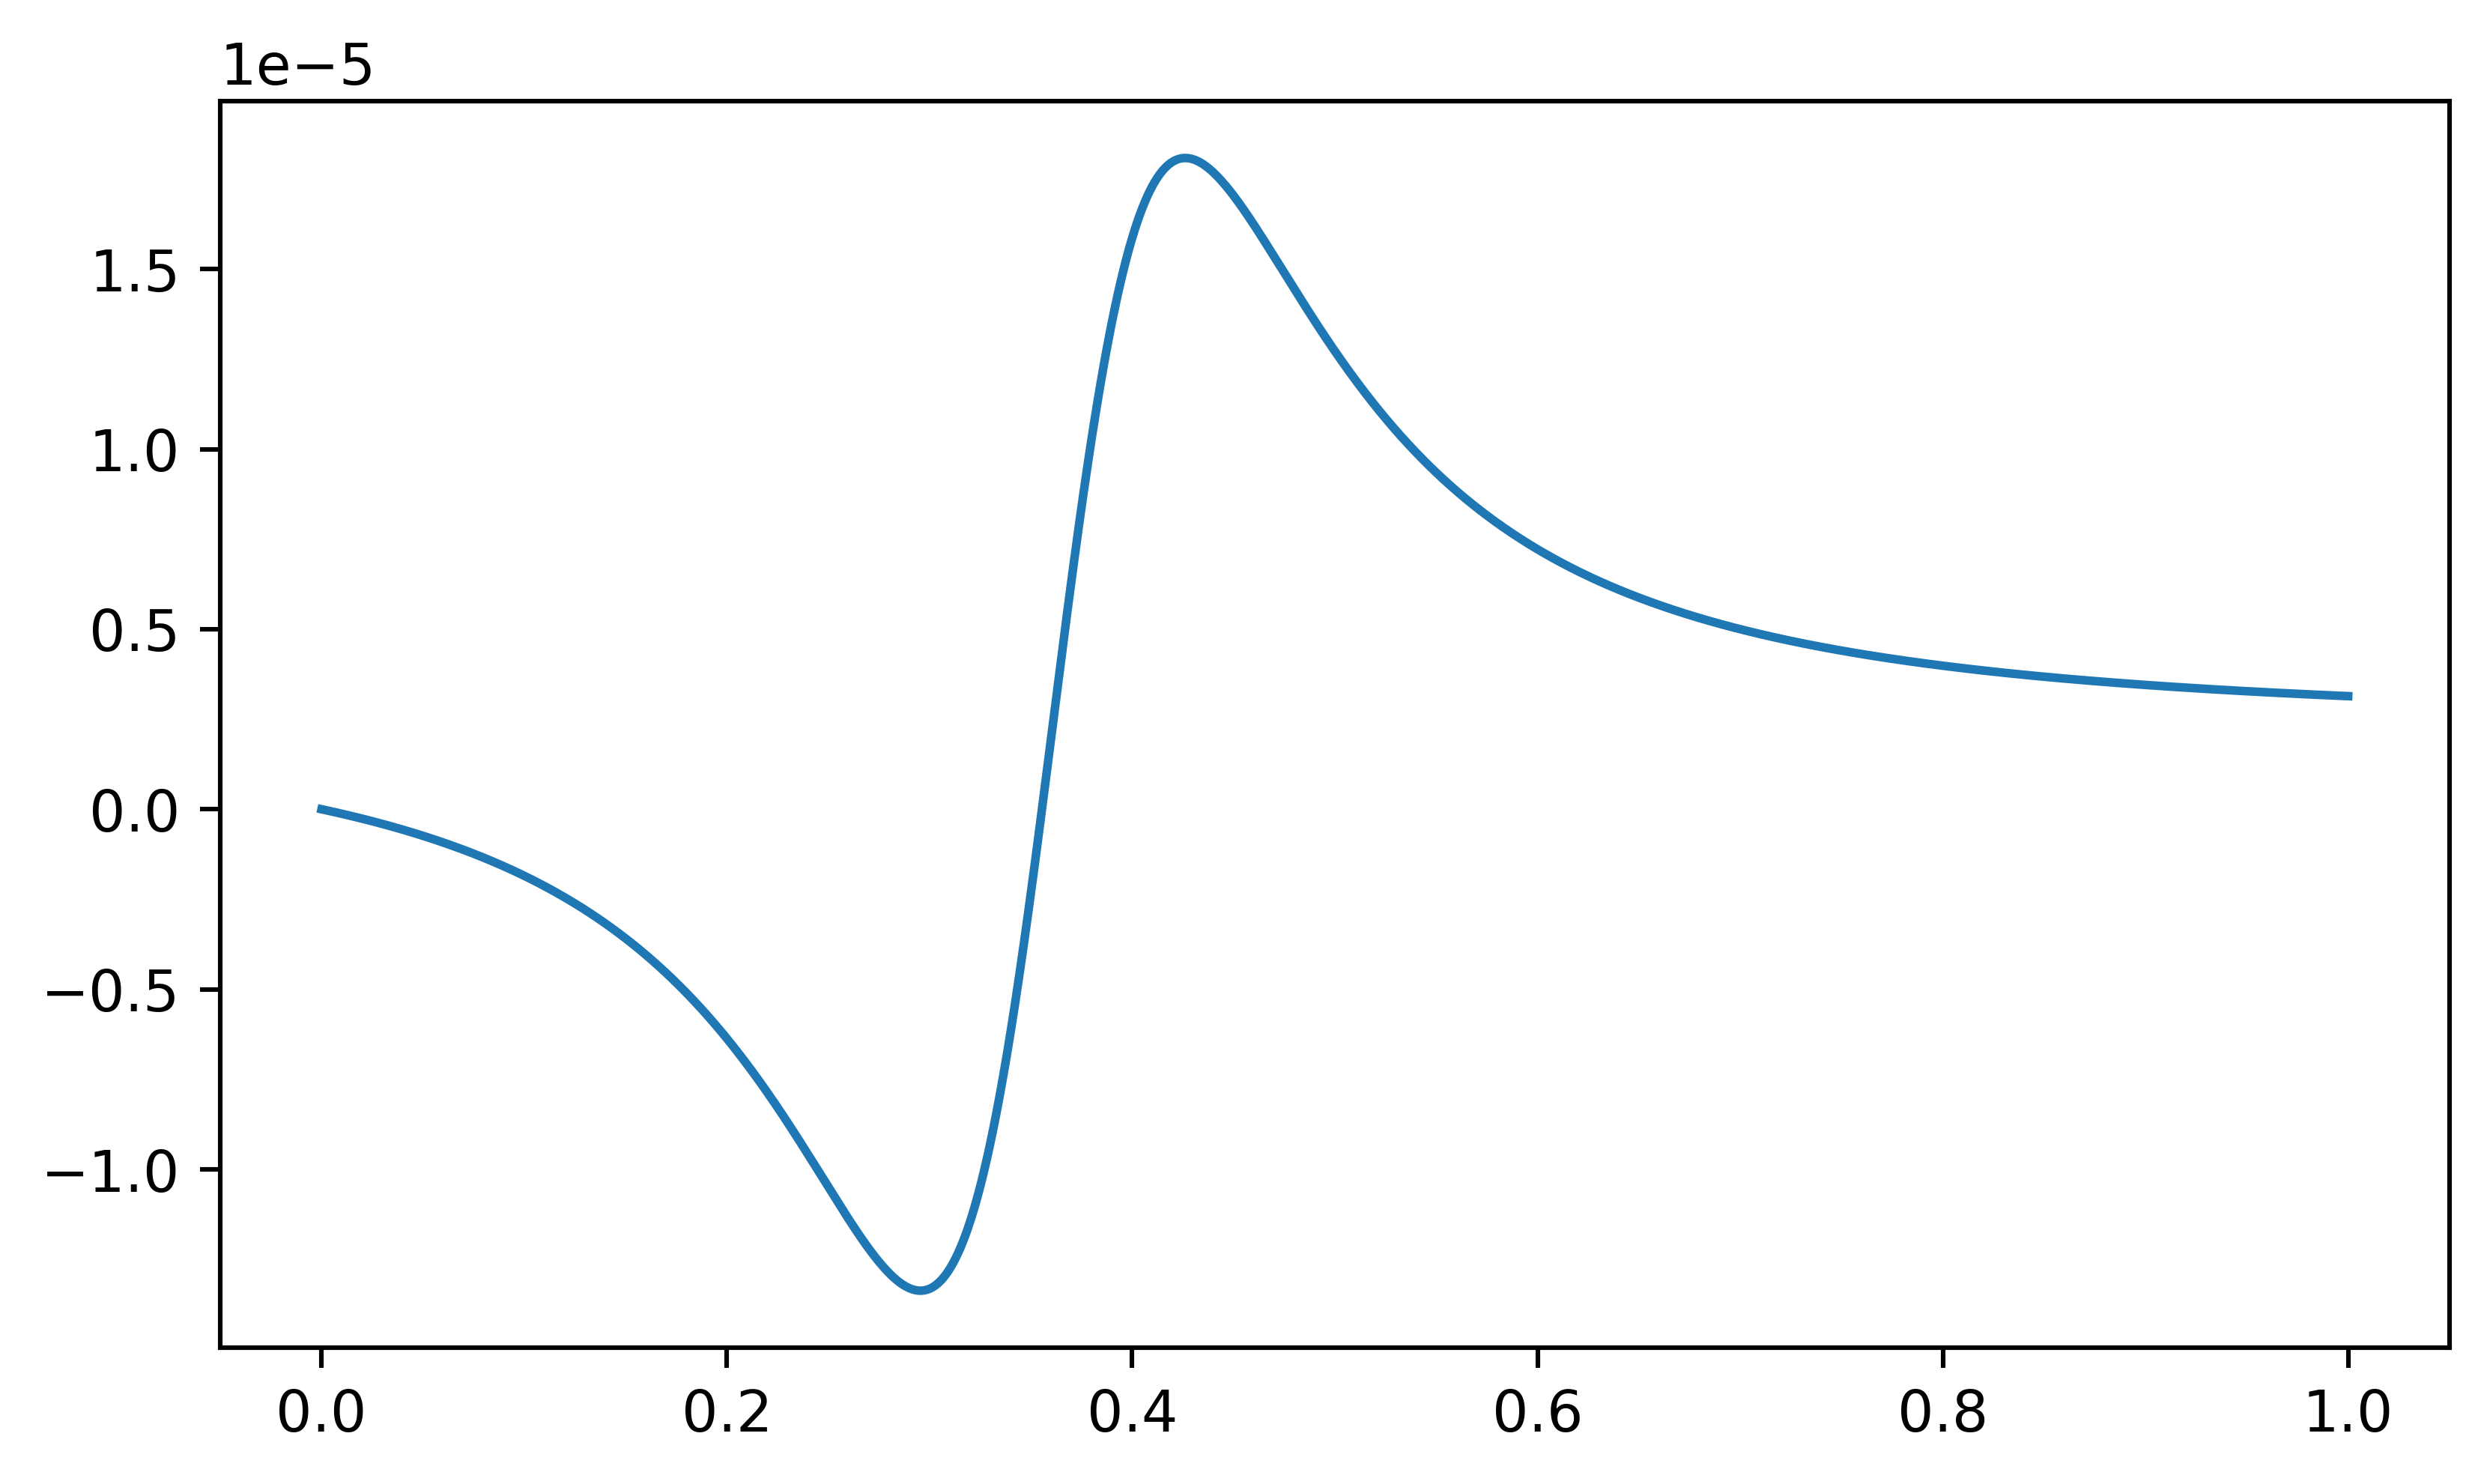

In [22]:
(X, Y, V_X, V_Y) = cal_X_Y(2)
E = 0.5*(V_X**2 + V_Y**2)+0.5/np.sqrt(X**2+Y**2)
plt.figure(figsize=(38.4/5.5, 21.6/5.5), dpi=550)
plt.plot(np.linspace(0,1,len(E)), E-E[0])

### This makes sense. After talking with Dr. Leung, I concluded that the total session of the alpha particle mothion can be devided into two parts. The first one is the incoming part. In this part, actually, $$r_m \prime < r_m$$ so in plain words, "too much" negtive work done by the electronic force. However, in the ongoing session, the situation is opposite to the former one, $${r_m}\prime  > r_m$$ which is "Too much" positive work done by the electronic force. So, the total energy will decrease at first, then it will have a recovery. Make sense to the graph.  

### In fact, I discovered this phenomenon at first when I try to draw a circle with $$ r = r_{m} $$ A part of motion is in the circle. At first I think it caused by numerical deviation, so, I put it aside. But, after discussing it with Dr. Leung, the graph can really explain the energy vibration. The reason is above.

0.1
0.25
0.5
1
2


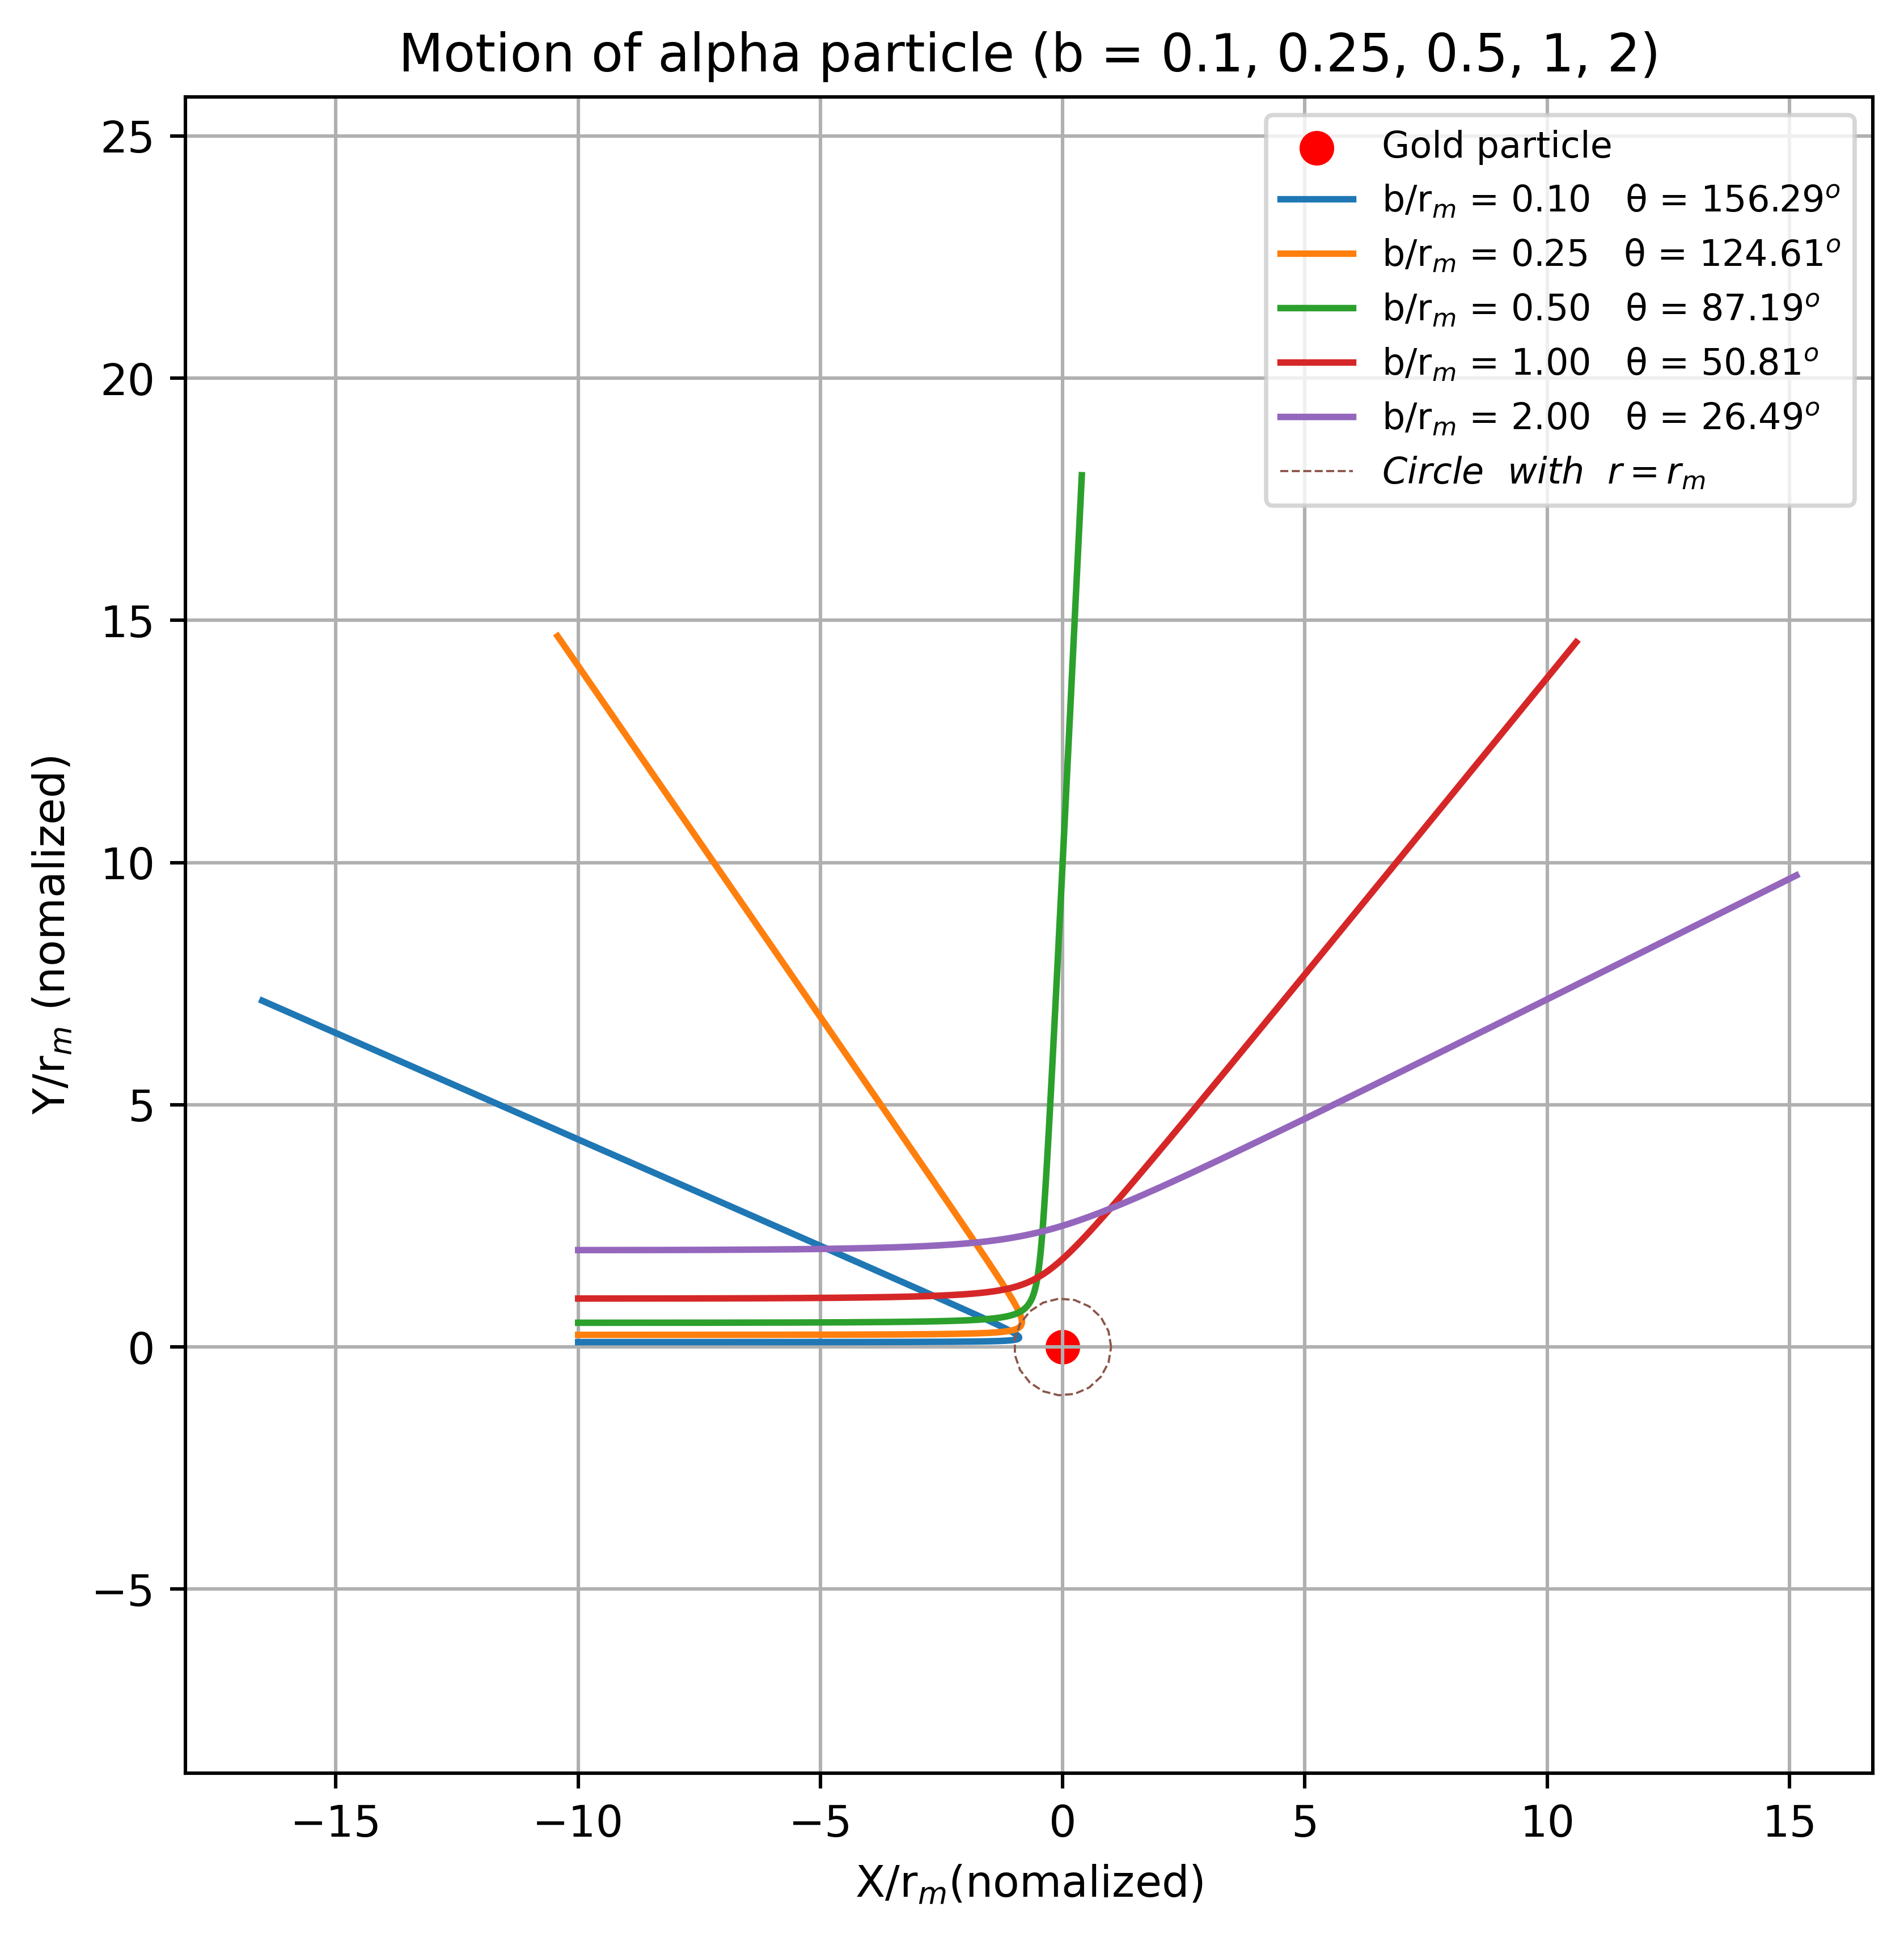

In [27]:
plt.figure(figsize=(38.4/5.5, 38.4/5.5), dpi=550)
plt.scatter([0], [0], marker='o', linewidths=2, label='Gold particle', c='r')
plt.axis('equal')
plt.grid()
plt.title(f"Motion of alpha particle (b = 0.1, 0.25, 0.5, 1, 2)")
for i in [0.1,0.25,0.5,1,2]:
    (X, Y, V_X, V_Y) = cal_X_Y(i)
    theta = np.arctan(V_Y[-1] / V_X[-1])
    if theta < 0:
        theta = np.pi - np.abs(theta)
    plt.plot(X, Y, label='b/r$_m$ = {:.2f}   '.format(i) + 'θ = {:.2f}$^o$'.format(theta*180/pi))
    print(i)
plt.xlabel("X/r$_m$(nomalized)")
plt.ylabel("Y/r$_m$ (nomalized)")
alpha = np.linspace(0, 2*np.pi, 20)
plt.plot(np.cos(alpha), np.sin(alpha), label="$Circle \ \ with \ \  r = r_m$", linewidth=0.5, linestyle='--')
plt.legend(fontsize="small")

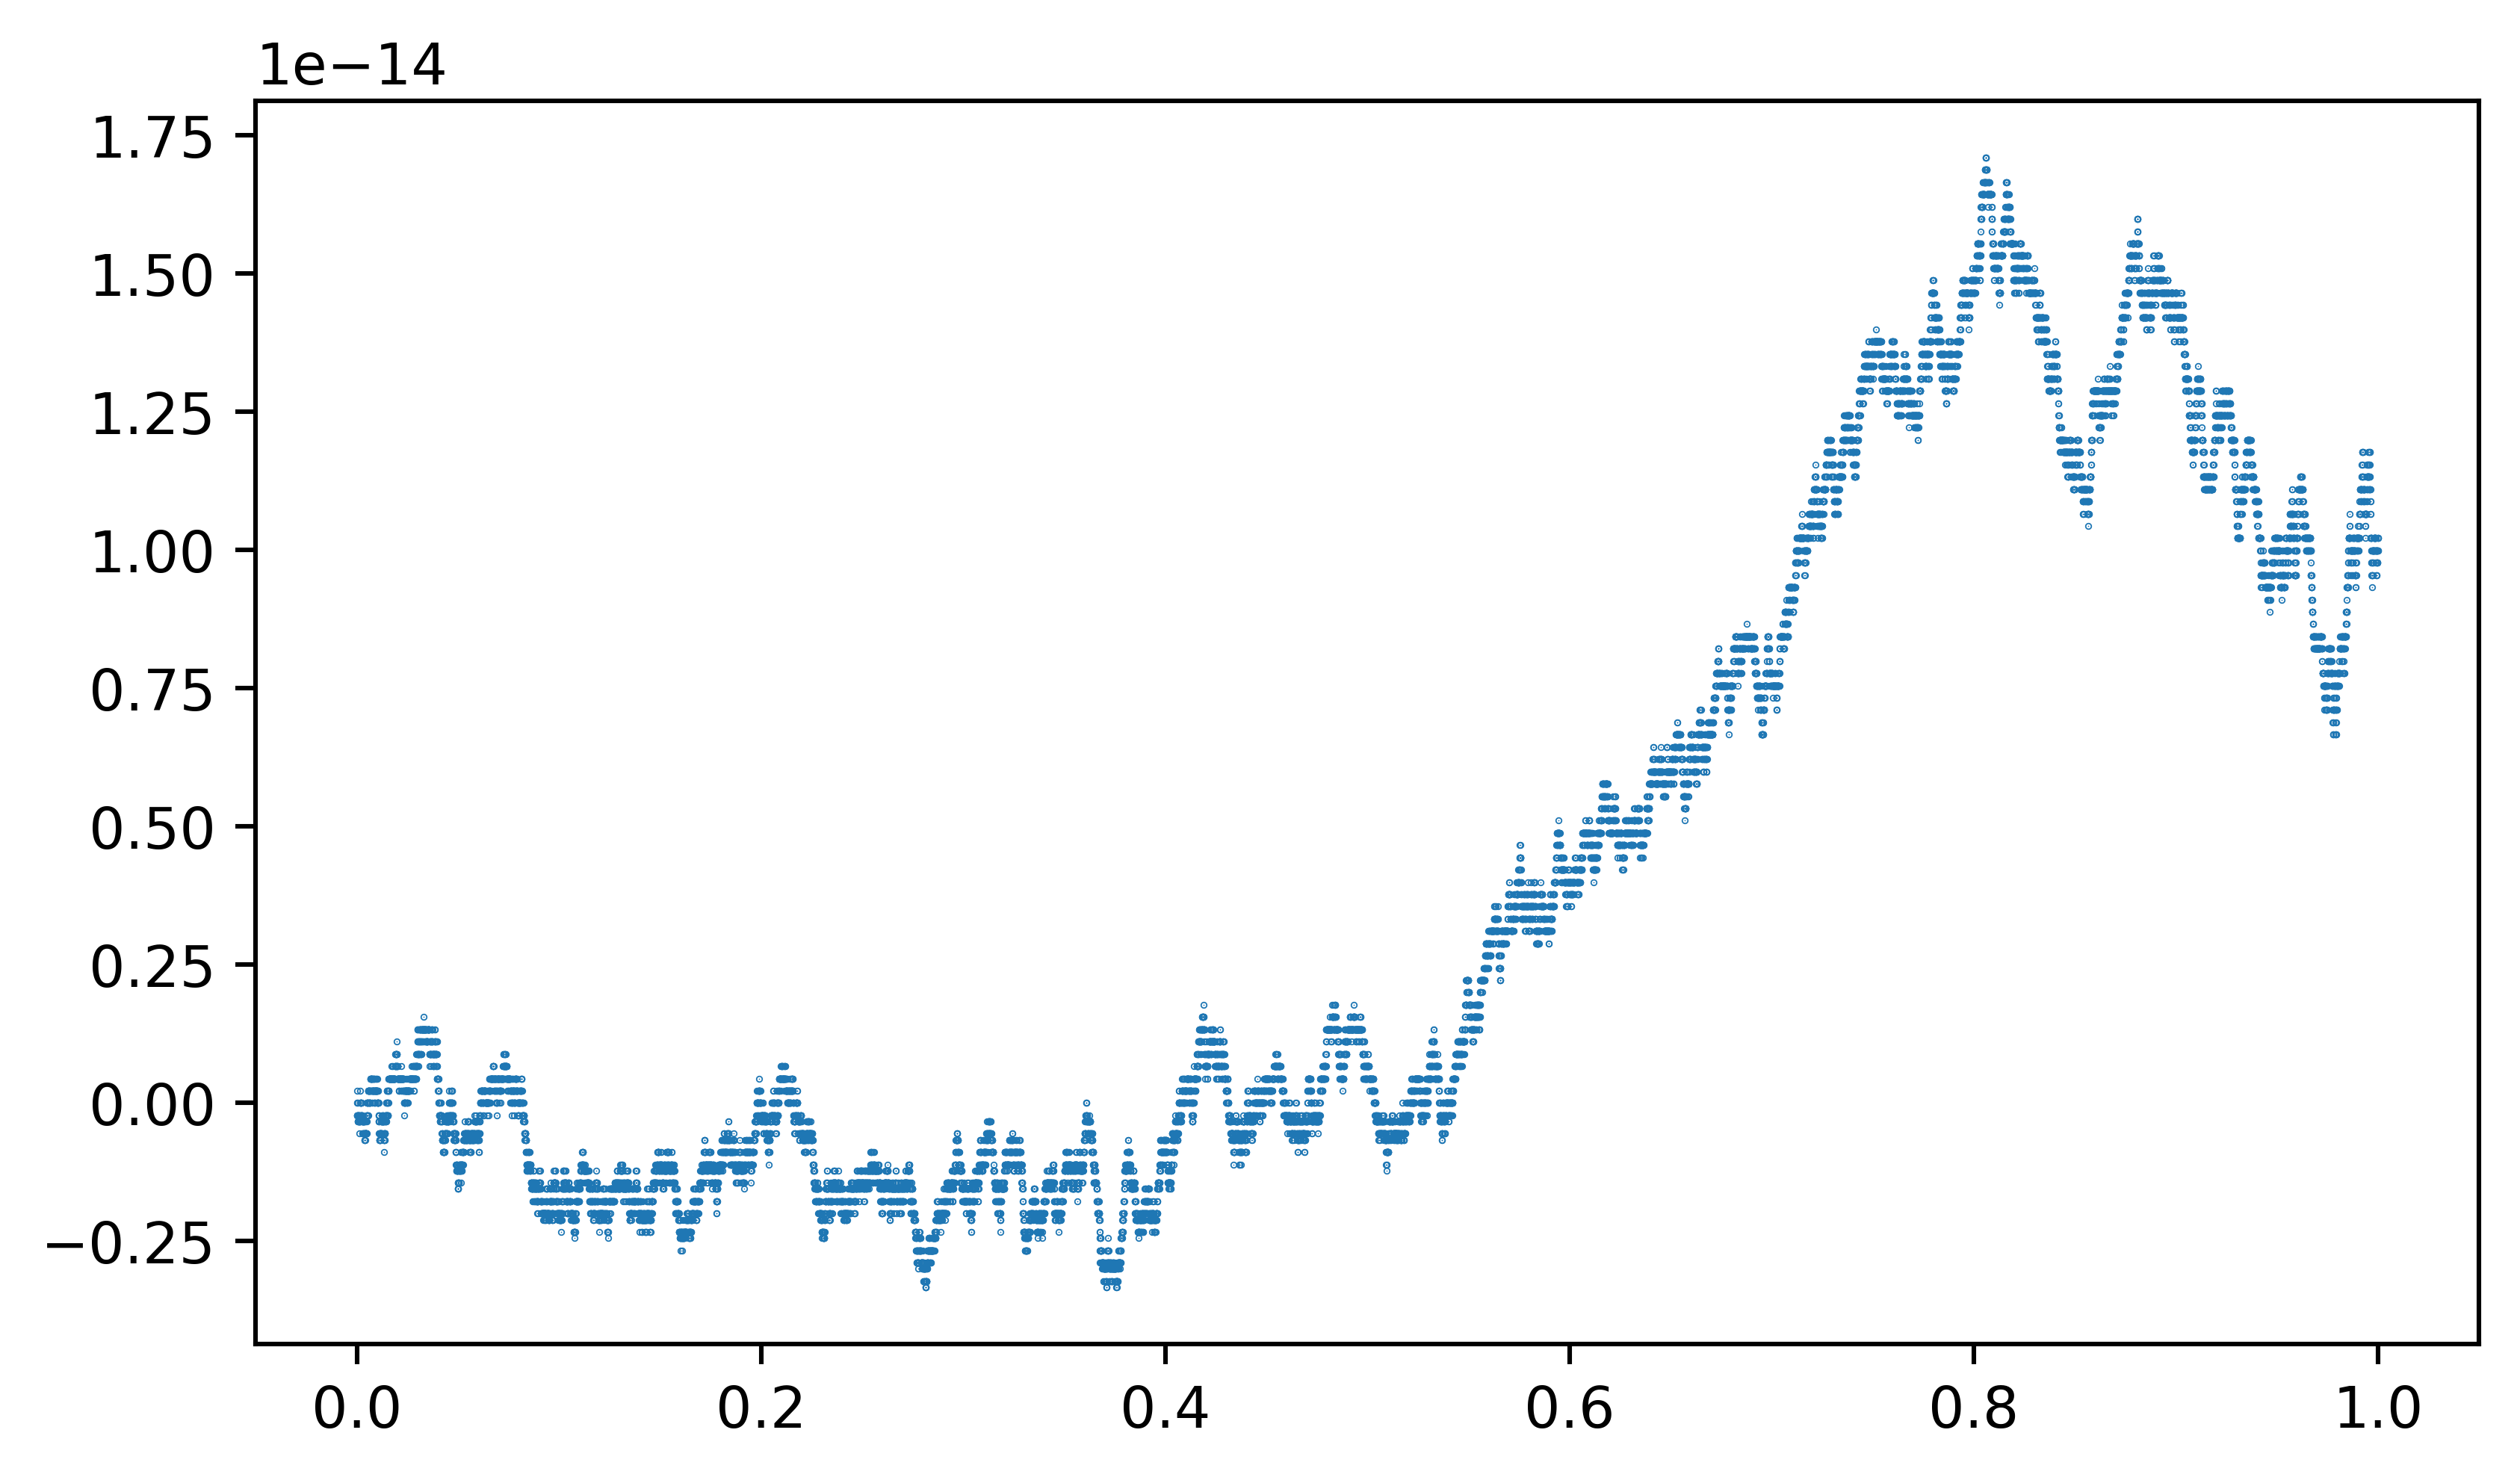

In [24]:
plt.figure(figsize=(38.4/5.5, 21.6/5.5), dpi=550) 
plt.scatter(np.linspace(0,1,len(L)), L/L[0]-1,s=0.05) 

## In the end, I want to share the question Dr. Leung asked. He asked me why you take $$ \Delta \tau = 0.001 $$ as it is small enough. At the beginning, we were all misleading because the comments on the guideline to keep energy and angular momentum conservation. By after thinking, the reason acutally should be $$ \Delta \tau = 0.001 \times \dfrac{r_m}{v_0} $$ As $ r_m $ is small to be the closest distance from the alpha particle to gold particle and $$ v_0 $$ is the max velocity when the particle is approching, so, $$ T = \dfrac{r_m}{v_0} $$ is the min time unit in the most natural way to calculate. In other word, as the total distance, $$ s > k = 10 \times r_m $$ we can get as least $$ 10 \times 1000 = 10000 $$ time slots which is enough. Remenber, figure out the unit is the most important thing in numerial calculation as it's alway ignored and also the first lesson we have learned in the class.

#  Reference Formula

$$ \Large m \dfrac{d^2 \vec r}{dt^2}=\dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 r^2}\hat e_r$$ 

$$\Large \hat e_r = \dfrac{\vec r}{r} = \dfrac{x \hat i + y \hat j}{r}$$ 

$$ \Large \dfrac{1}{2}mv^2_0 = \dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 r_m}\hat e_r$$

$$\Large v_0 = \dfrac{r_m}{T}$$ 

$$\Large T = \sqrt{\dfrac{2 \pi m \epsilon_0 r_m^3}{Z_1 Z_2 e^2}}$$ 

 $$\Large t=T \tau \quad \vec r = r_m \vec R$$

$$\Large \dfrac{d^2 \vec R}{d \tau^2} = \dfrac{1}{2R^2}\hat e_r$$ 

$$\Large A_X = \dfrac{X}{2R^3} \quad A_Y = \dfrac{Y}{2R^3}$$  

$$\Large R = \sqrt{X^2+Y^2}$$ 

$$\Large X(n+1) = X(n)+V_X(n) \Delta \tau  \quad V(n+1) = V(n)+A_X(n)\Delta \tau $$

$$\Large \theta = \tan^{-1} \dfrac{V_Y}{V_X} \quad  \theta = \pi - \tan^{-1} \dfrac{V_Y}{|V_X|}$$ 

$$\Large E = \dfrac{1}{2}(V^2_X  + V^2_Y)  + \dfrac{1}{2  R} \quad L = XV_Y  - YV_X = (\vec R \times \dfrac{\vec P}{m})z$$ 

$$\Large  \tan \dfrac{\theta}{2} = \dfrac{Z_1 Z_2 e^2}{4 \pi \epsilon_0 m v_0^2} \dfrac{1}{b}  $$